In [7]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [9]:
df_receipts = pd.read_csv("./data/receipts.csv")
df_receipts.head()

,image_path,bbox_path,funsd_path,label_path
0,./data/receipts/groceries\0.jpg,./data/bbox-data\0.json,./data/annotations\0.json,./data/labels\0.json
1,./data/receipts/groceries\1.jpg,./data/bbox-data\1.json,./data/annotations\1.json,./data/labels\1.json
2,./data/receipts/groceries\11.jpg,./data/bbox-data\11.json,./data/annotations\11.json,./data/labels\11.json
3,./data/receipts/groceries\15.jpg,./data/bbox-data\15.json,./data/annotations\15.json,./data/labels\15.json
4,./data/receipts/groceries\16.jpg,./data/bbox-data\16.json,./data/annotations\16.json,./data/labels\16.json


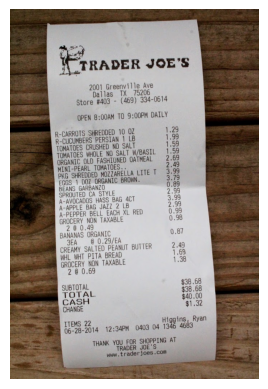

[
    {
        "id": 0,
        "text": "2001 Greenville Ave, Dallas, TX 75206",
        "label": "location",
        "box": [
            100,
            200,
            400,
            220
        ],
        "linking": []
    },
    {
        "id": 1,
        "text": "TRADER JOE'S",
        "label": "shop_vendor",
        "box": [
            100,
            120,
            400,
            150
        ],
        "linking": []
    },
    {
        "id": 2,
        "text": "06-28-2014 12:34PM",
        "label": "datetime",
        "box": [
            100,
            1050,
            400,
            1080
        ],
        "linking": []
    },
    {
        "id": 3,
        "text": "R-CARROTS SHREDDED 10 OZ 1 1.29",
        "label": "item",
        "box": [
            100,
            300,
            560,
            320
        ],
        "linking": []
    },
    {
        "id": 4,
        "text": "R-CUCUMBERS PERSIAN 1 LB 1 1.99",
        "label": "item",
        "box": [

In [13]:
example_row = df_receipts.iloc[0]
image_path, annotation_file_path = example_row["image_path"], example_row["funsd_path"]

img = plt.imread(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

def get_image_annotations(annotation_file_path): 
    with open(annotation_file_path, "r") as file:
        annotations = json.load(file)
        return annotations

print(json.dumps(get_image_annotations(annotation_file_path), indent=4))

In [18]:
def get_labels(annotation_file_path):
    annotations = get_image_annotations(annotation_file_path)
    receipt_data = {
        "datetime": None,
        "location": None,
        "items": [],
        "shop": None,
        "total": None
    }
    
    for annotation in annotations:
        label, text = annotation["label"], annotation["text"]
        if label == "item":
            receipt_data["items"].append(text) 
        elif label == "shop_vendor":
            receipt_data["shop"] = text
        else:
            receipt_data[label] = text
    return receipt_data

{'datetime': '06-28-2014 12:34PM',
 'location': '2001 Greenville Ave, Dallas, TX 75206',
 'items': ['R-CARROTS SHREDDED 10 OZ 1 1.29',
  'R-CUCUMBERS PERSIAN 1 LB 1 1.99',
  'TOMATOES CRUSHED NO SALT 1 1.59',
  'TOMATOES WHOLE NO SALT W/BASIL 1 1.59',
  'ORGANIC OLD FASHIONED OATMEAL 1 2.29',
  'MINI-PEARL TOMATOES 1 2.49',
  'PKG SHREDDED MOZZARELLA LITE T 1 3.79',
  'SPROUTED BROWN BREAD 1 2.99',
  'R-AVOCADOS HASS BAG 4CT 1 3.99',
  'A-APPLE BAG JAZZ 2 LB 1 2.69',
  'A-PEPPER BELL EACH XL RED 1 0.99',
  'BANANAS ORGANIC 1 0.87',
  'CREAMY SALTED PEANUT BUTTER 1 2.49',
  'WHL WHT PITA BREAD 1 1.38'],
 'shop': "TRADER JOE'S",
 'total': 'TOTAL 38.68'}

In [21]:
def write_json_to_file(file_path, json_data):
    text = json.dumps(json_data, indent=4)
    folder = os.path.dirname(file_path)
    if not os.path.exists(folder):
        os.makedirs(folder)
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(text)

# for index, row in df_receipts.iterrows():
#     annotation_file_path = row["funsd_path"]
#     label_path = row ["label_path"]
#     labels = get_labels(annotation_file_path)
#     write_json_to_file(label_path, labels)


    